This notebook purpose is verify the data for all projects and to calculated the Wilcoxon test (for the mean and median). The geometric mean here is not the one used in the paper.

In [3]:
#These are all the necessary imports for this notebook. Make sure you have all of the dependencies installed.
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

This is the data preparation. We are getting the mean and median of the distribution metrics for all projects and separating it into Before CI/CD and After CI/CD

In [4]:
data_java = pd.read_csv('.\Data\projects_java_mean_median.csv')
data_android = pd.read_csv('.\Data\projects_android_mean_median.csv')

In [5]:
df_mean = data_java[data_java['Version'] == 'Mean'].append(data_android[data_android['Version'] == 'Mean'])

In [6]:
df_mean = df_mean.reset_index(drop=True)

In [7]:
df_median = data_java[data_java['Version'] == 'Median'].append(data_android[data_android['Version'] == 'Median'])

In [8]:
df_median = df_median.reset_index(drop=True)

In [9]:
df_gmean = data_java[data_java['Version'] == 'Geo-Mean'].append(data_android[data_android['Version'] == 'Geo-Mean'])

In [10]:
df_gmean = df_gmean.reset_index(drop=True)

In [11]:
before_mean = df_mean[df_mean['Period'] == 'Before CI/CD']
before_median = df_median[df_mean['Period'] == 'Before CI/CD']
before_gmean = df_gmean[df_gmean['Period'] == 'Before CI/CD']

In [12]:
after_mean = df_mean[df_mean['Period'] == 'After CI/CD']
after_median = df_median[df_mean['Period'] == 'After CI/CD']
after_gmean = df_gmean[df_gmean['Period'] == 'After CI/CD']

In [13]:
projects_mean = [before_mean['N.Atoms'], after_mean['N.Atoms']]

From here, we made plots when considering the mean, median and geometric mean of all the three metrics.

[Text(0.5, 0, ''), Text(0, 0.5, 'ACR')]

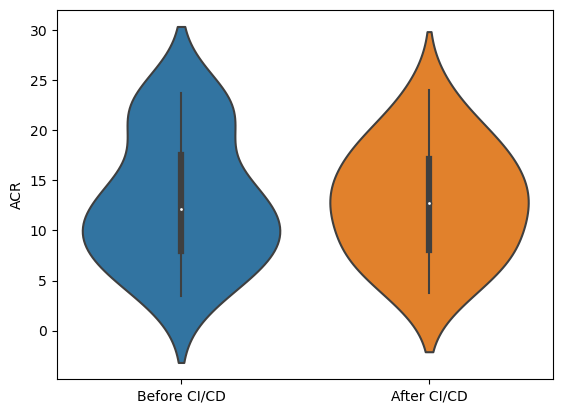

In [14]:
sns.violinplot(data=df_mean, x="Period", y = 'Number of Atoms per LoC (10^-3)', cut=1.9).set(xlabel='', ylabel='ACR')


[Text(0.5, 0, ''), Text(0, 0.5, 'ACR')]

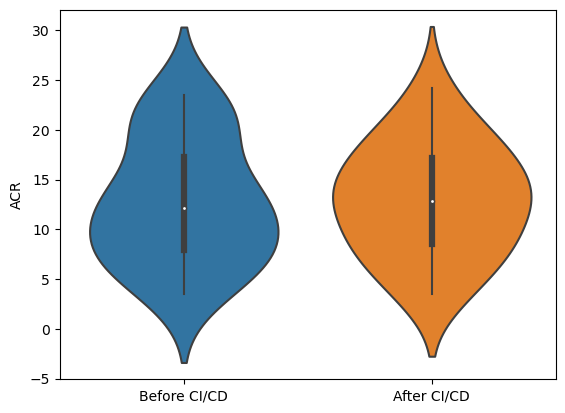

In [15]:
sns.violinplot(data=df_median, x="Period", y = 'Number of Atoms per LoC (10^-3)').set(xlabel='', ylabel='ACR')

[Text(0.5, 0, ''), Text(0, 0.5, 'ACR')]

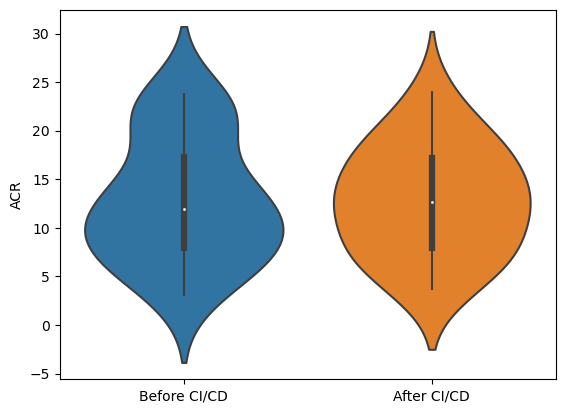

In [16]:
sns.violinplot(data=df_gmean, x="Period", y = 'Number of Atoms per LoC (10^-3)').set(xlabel='', ylabel='ACR')

[Text(0.5, 0, ''), Text(0, 0.5, 'ACDIF')]

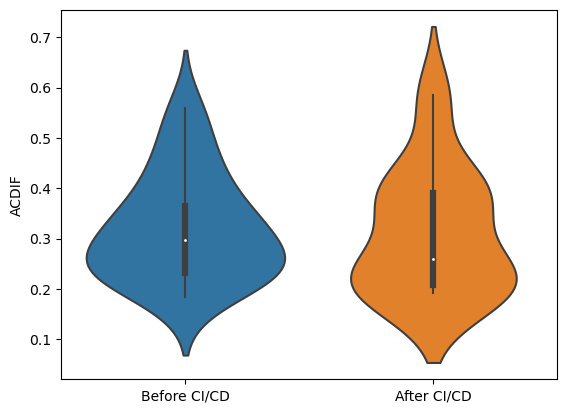

In [17]:
sns.violinplot(data=df_mean, x="Period", y = 'Atom Diffusion').set(xlabel='', ylabel='ACDIF')

[Text(0.5, 0, ''), Text(0, 0.5, 'ACDIF')]

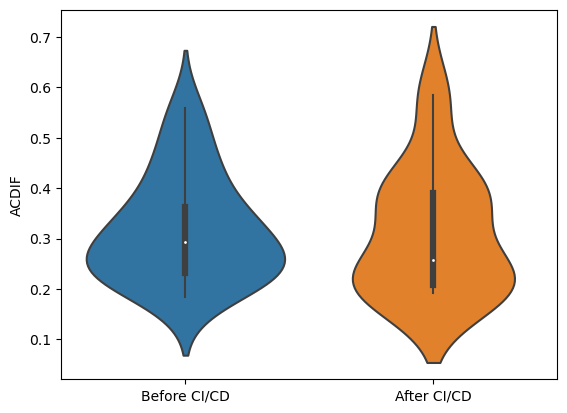

In [18]:
sns.violinplot(data=df_gmean, x="Period", y = 'Atom Diffusion').set(xlabel='', ylabel='ACDIF')

[Text(0.5, 0, ''), Text(0, 0.5, 'ACDEN')]

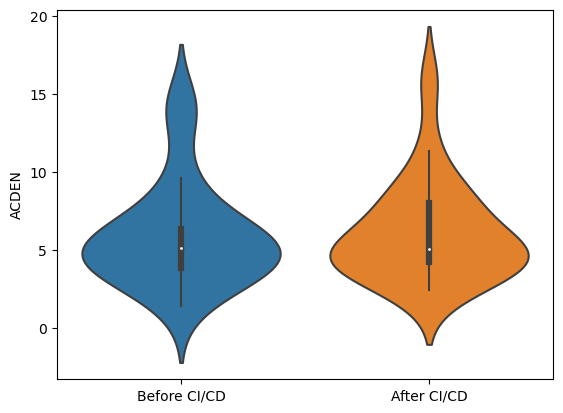

In [19]:
sns.violinplot(data=df_mean, x="Period", y = 'Atom Density').set(xlabel='', ylabel='ACDEN')

[Text(0.5, 0, ''), Text(0, 0.5, 'ACDEN')]

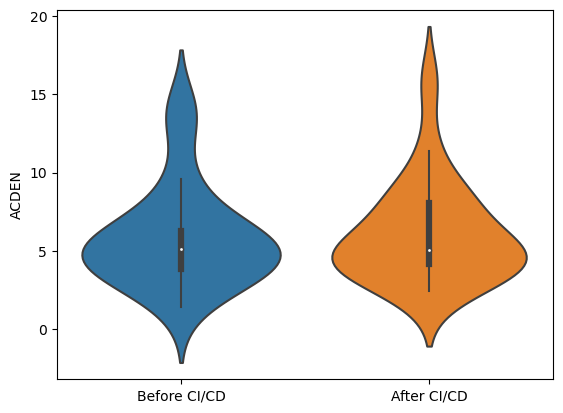

In [20]:
sns.violinplot(data=df_gmean, x="Period", y = 'Atom Density').set(xlabel='', ylabel='ACDEN')

And from here until the end of the notebook, we compare the metrics using the Wilcoxon test. The main comparison is the first one, but we also use the alternatives for a better understanding.

ACR

Mean

In [21]:
X_mean = np.array(before_mean['Number of Atoms per LoC (10^-3)'])
Y_mean = np.array(after_mean['Number of Atoms per LoC (10^-3)'])

In [22]:
stats.wilcoxon(X_mean, Y_mean)

WilcoxonResult(statistic=99.0, pvalue=0.8408222198486328)

In [23]:
stats.wilcoxon(X_mean, Y_mean, alternative='greater')

WilcoxonResult(statistic=99.0, pvalue=0.5938224792480469)

In [24]:
stats.wilcoxon(X_mean, Y_mean, alternative='less')

WilcoxonResult(statistic=99.0, pvalue=0.4204111099243164)

Median

In [25]:
X_median = np.array(before_median['Number of Atoms per LoC (10^-3)'])
Y_median = np.array(after_median['Number of Atoms per LoC (10^-3)'])

In [26]:
stats.wilcoxon(X_median, Y_median)

WilcoxonResult(statistic=94.0, pvalue=0.7011814117431641)

In [27]:
stats.wilcoxon(X_median, Y_median, alternative='greater')

WilcoxonResult(statistic=94.0, pvalue=0.6628885269165039)

In [28]:
stats.wilcoxon(X_median, Y_median, alternative='less')

WilcoxonResult(statistic=94.0, pvalue=0.35059070587158203)

Geometric Mean

In [29]:
X_gmean = np.array(before_gmean['Number of Atoms per LoC (10^-3)'])
Y_gmean = np.array(after_gmean['Number of Atoms per LoC (10^-3)'])

In [30]:
stats.wilcoxon(X_gmean, Y_gmean)

WilcoxonResult(statistic=93.0, pvalue=0.6742229461669922)

In [31]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='greater')

WilcoxonResult(statistic=93.0, pvalue=0.6761722564697266)

In [32]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='less')

WilcoxonResult(statistic=93.0, pvalue=0.3371114730834961)

ACDIF

Mean

In [33]:
X_mean = np.array(before_mean['Atom Diffusion'])
Y_mean = np.array(after_mean['Atom Diffusion'])

In [34]:
stats.wilcoxon(X_mean, Y_mean)

WilcoxonResult(statistic=89.0, pvalue=0.5705966949462891)

In [35]:
stats.wilcoxon(X_mean, Y_mean, alternative='greater')

WilcoxonResult(statistic=121.0, pvalue=0.28529834747314453)

In [36]:
stats.wilcoxon(X_mean, Y_mean, alternative='less')

WilcoxonResult(statistic=121.0, pvalue=0.7270622253417969)

Median

In [37]:
X_median = np.array(before_median['Atom Diffusion'])
Y_median = np.array(after_median['Atom Diffusion'])

In [38]:
stats.wilcoxon(X_median, Y_median)

f:\miniconda3\envs\aicons2\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=82.0, pvalue=0.6008710115741303)

In [39]:
stats.wilcoxon(X_median, Y_median, alternative='greater')

WilcoxonResult(statistic=108.0, pvalue=0.3004355057870651)

In [40]:
stats.wilcoxon(X_median, Y_median, alternative='less')

WilcoxonResult(statistic=108.0, pvalue=0.6995644942129349)

Geometric Mean

In [41]:
X_gmean = np.array(before_gmean['Atom Diffusion'])
Y_gmean = np.array(after_gmean['Atom Diffusion'])

In [42]:
stats.wilcoxon(X_gmean, Y_gmean)

WilcoxonResult(statistic=93.0, pvalue=0.6742229461669922)

In [43]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='greater')

WilcoxonResult(statistic=117.0, pvalue=0.3371114730834961)

In [44]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='less')

WilcoxonResult(statistic=117.0, pvalue=0.6761722564697266)

ACDEN

Mean

In [45]:
X_mean = np.array(before_mean['Atom Density'])
Y_mean = np.array(after_mean['Atom Density'])

In [46]:
stats.wilcoxon(X_mean, Y_mean)

WilcoxonResult(statistic=88.0, pvalue=0.5458755493164062)

In [47]:
stats.wilcoxon(X_mean, Y_mean, alternative='greater')

WilcoxonResult(statistic=88.0, pvalue=0.7391633987426758)

In [48]:
stats.wilcoxon(X_mean, Y_mean, alternative='less')

WilcoxonResult(statistic=88.0, pvalue=0.2729377746582031)

Median

In [49]:
X_median = np.array(before_median['Atom Density'])
Y_median = np.array(after_median['Atom Density'])

In [50]:
stats.wilcoxon(X_median, Y_median)

WilcoxonResult(statistic=89.0, pvalue=0.5705966949462891)

In [51]:
stats.wilcoxon(X_median, Y_median, alternative='greater')

WilcoxonResult(statistic=89.0, pvalue=0.7270622253417969)

In [52]:
stats.wilcoxon(X_median, Y_median, alternative='less')

WilcoxonResult(statistic=89.0, pvalue=0.28529834747314453)

Geometric Mean

In [53]:
X_gmean = np.array(before_gmean['Atom Density'])
Y_gmean = np.array(after_gmean['Atom Density'])

In [54]:
stats.wilcoxon(X_gmean, Y_gmean)

WilcoxonResult(statistic=89.0, pvalue=0.5705966949462891)

In [55]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='greater')

WilcoxonResult(statistic=89.0, pvalue=0.7270622253417969)

In [56]:
stats.wilcoxon(X_gmean, Y_gmean, alternative='less')

WilcoxonResult(statistic=89.0, pvalue=0.28529834747314453)